Rafael Velasco Huerta - A01283168

<a href="https://ibb.co/ts9MvNN"><img src="https://i.ibb.co/qsvMc44/Corporacion-Favorita-Tec.png" alt="Corporacion-Favorita-Tec" border="0" width = "700"></a>

# Proyecto Final: Ciencia de Datos

> ## A. Definición de objetivo del problema

Corporación Favorita es una empresa ecuatoriana de tiendas de autoservicio, inversiones inmobiliarias, generación eléctrica, producción de alimentos y productos de primera necesidad, comercio, y ferretería. 

En este caso nos estaremos enfocando en las tiendas de autoservicio, en donde existe la necesidad de predecir las ventas de diferentes familias de productos con el objetivo de que las personas puedan obtener la cantidad de productos que necesitan en el momento en el que lo necesitan.

Este requerimiento puede surgir por diferentes necesidades:
- Inventarios: Al sobresaturar los estantes con comida perecedera, se echarán a perder los alimentos, perdiendo la mercancía y su venta. Al haber productos faltantes se perderán ingresos y los clientes quedarán insatisfechos y comprarán en otro lugar dichos productos.
- Planeación financiera: En caso de que haya diferencias significativas entre las ventas de ciertas temporadas, tener conocimiento de las ventas futuras será de mucha utilidad para anticiparse y dirigir el manejo de recursos económicos.
- Alineación a objetivos estratégicos: Saber si la venta de productos cumplirá con los objetivos a corto, mediano y largo plazo puede significar la posibilidad de corregir el curso de los esfuerzos para elevar el número de ventas.

El enfoque de este proyecto será ayudar a predecir las ventas utilizando Machine Learning con el lenguaje de programación Python.

> ## B. Recopilación de la información

La información de ventas de Corporación Favorita se recopiló de la actual competencia de dicha empresa en el sitio de Kaggle, una comunidad de científicos de datos y profesionales de ML.

<a href="https://ibb.co/ZxT6Hk3"><img src="https://i.ibb.co/hV8RXtk/640px-Kaggle-logo.png" alt="640px-Kaggle-logo" border="0" width = "100"></a>

EL link para acceder a las diferentes de información es el siguiente:

https://www.kaggle.com/competitions/store-sales-time-series-forecasting/data

> ## C. Overview y limpieza de información

El set de datos incluye siete archivos .csv con diferentes tablas:

- train.csv: Información de ventas con la fecha, el número de tienda, familia de productos, ventas y número de items promovidos de esa familia de productos en esa fecha
- test.csv: La misma información sin la variable a predecir, ventas
- stores.csv: Información de las tiendas
- holidays_events.csv: Información de los días festivos, días no trabajados, asuetos y algunos eventos; se incluye su descripción y lugar de celebración
- oil.csv: Información histórica del precio del petróleo crudo (WTICO), pues Ecuador es una economía que es significativamente afectada por el petróleo
- transactions.csv: Número de transacciones por tienda por fecha
- sample_submission.csv: Un archivo con el formato correcto de envío de predicciones

### Combinación (join) de tablas

Para sacar el mayor provecho de la información que tenemos, tenemos que combinarla a través de joins. En este proceso, se combinan las columnas de dos tablas a través de una columna llave (la columna utilizada para encontrar en qué filas combinar) para crear una tabla final en donde se tienen columnas de ambas tablas.

<a href="https://imgbb.com/"><img src="https://i.ibb.co/5j6BVks/merging-merge-on-key.png" alt="merging-merge-on-key" border="0" width="500"></a>

En este caso uniremos las siguientes tablas:
- train.csv
- stores.csv
- holidays_events.csv
- oil.csv
- transactions.csv

#### Nota: Para practicidad, antes del proceso de combinación de tablas y de limpieza y transformación de datos, se unirá la tabla de entrenamiento y prueba para poder obtener las mismas columnas y dimensiones en ambas tablas. Antes de entrenar el modelo con la tabla, se separarán en los dos datasets originales, cada uno con sus filas iniciales

### 1) Importar librerías

In [8]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn import model_selection
from sklearn.metrics import mean_squared_log_error as msle

### 2) Importar datos

In [9]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_stores = pd.read_csv('stores.csv')
df_oils = pd.read_csv('oil.csv')
df_holidays = pd.read_csv('holidays_events.csv')
df_transactions = pd.read_csv('transactions.csv')

### 3) Dimensiones y Datos faltantes

In [10]:
dataframes = [[df_train, "Train"], [df_test, "Test"], [df_stores,"Stores"], [df_oils, "Oils"], [df_holidays, "Holidays"], [df_transactions,"Transactions"]]

for dataframe, name in dataframes:
    print(name, "\n")
    print("Dimensiones: ", dataframe.shape, "\n")
    print("Número de valores nulos")
    print(dataframe.isnull().sum(), "\n\n\n")

Train 

Dimensiones:  (3000888, 6) 

Número de valores nulos
id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64 



Test 

Dimensiones:  (28512, 5) 

Número de valores nulos
id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64 



Stores 

Dimensiones:  (54, 5) 

Número de valores nulos
store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64 



Oils 

Dimensiones:  (1218, 2) 

Número de valores nulos
date           0
dcoilwtico    43
dtype: int64 



Holidays 

Dimensiones:  (350, 6) 

Número de valores nulos
date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64 



Transactions 

Dimensiones:  (83488, 3) 

Número de valores nulos
date            0
store_nbr       0
transactions    0
dtype: int64 





### 4) Unión de dataset de entrenamiento con dataset de prueba

##### Recordatorio: Se realiza este proceso únicamente para practicidad en la limpieza y transformación de datos. Antes de entrenar el modelo se separarán con sus filas originales

In [11]:
df_train = pd.concat([df_train, df_test])

In [12]:
df_train.reset_index(drop = True, inplace = True)
df_train.iloc[-28513:].head()

,id,date,store_nbr,family,sales,onpromotion
3000887,3000887,2017-08-15,9,SEAFOOD,16.0,0
3000888,3000888,2017-08-16,1,AUTOMOTIVE,NaN,0
3000889,3000889,2017-08-16,1,BABY CARE,NaN,0
3000890,3000890,2017-08-16,1,BEAUTY,NaN,2
3000891,3000891,2017-08-16,1,BEVERAGES,NaN,20


### 5) Join: df_train y df_stores

In [13]:
df_train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [14]:
df_stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [15]:
df_complete = pd.merge(left = df_train, right = df_stores, how = "left", on = "store_nbr")
df_complete.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13


### 6) Join con df_oils

In [16]:
df_oils.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


#### Eliminamos las fechas en donde el valor es nulo

In [17]:
df_oils = df_oils[~df_oils['dcoilwtico'].isnull()]

#### Hacemos el join

In [18]:
df_complete = pd.merge(left = df_complete, right = df_oils, how = "left", on = "date")
df_complete.tail()

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,dcoilwtico
3029395,3029395,2017-08-31,9,POULTRY,NaN,1,Quito,Pichincha,B,6,47.26
3029396,3029396,2017-08-31,9,PREPARED FOODS,NaN,0,Quito,Pichincha,B,6,47.26
3029397,3029397,2017-08-31,9,PRODUCE,NaN,1,Quito,Pichincha,B,6,47.26
3029398,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,NaN,9,Quito,Pichincha,B,6,47.26
3029399,3029399,2017-08-31,9,SEAFOOD,NaN,0,Quito,Pichincha,B,6,47.26


### 7) JOIN con df_transactions

In [19]:
# Creo la columna "date+store:nbr" para usarla como llave y hacer el join con df_transactions
df_transactions['date+store_nbr'] = df_transactions['date'].astype(str) + " " + df_transactions['store_nbr'].astype(str)
df_transactions.drop(columns = ['date', 'store_nbr'], inplace = True)
df_complete['date+store_nbr'] = df_complete['date'].astype(str) + " " + df_complete['store_nbr'].astype(str)

In [20]:
df_complete = pd.merge(left = df_complete, right = df_transactions, how = 'left', on = 'date+store_nbr')
df_complete.drop(columns = ['date+store_nbr'], inplace = True)
df_complete.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,dcoilwtico,transactions
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,NaN,NaN
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,NaN,NaN
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,NaN,NaN
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,NaN,NaN
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,NaN,NaN


In [21]:
df_complete.shape

(3029400, 12)

### 8) JOIN con df_holidays

##### Se buscarán obtener tres nuevas columnas: ["isLocalHoliday", "isRegionalHoliday", "isNationalHoliday"]

- #### Creación de nuevas tablas de días festivos para cada una de las tres columnas

In [22]:
def get_Locale_Holidays(dataframe, locale_type):
    holiday_df = dataframe[dataframe['locale'] == locale_type]
    holiday_df = holiday_df[['date', 'locale_name']]
    holiday_df['date+'+locale_type+'_name'] = holiday_df['date'].astype(str) + " - " + holiday_df['locale_name'].astype(str)
    holiday_df['is'+locale_type+'Holiday'] = 1
    holiday_df.drop(columns = ['date','locale_name'], inplace = True)
    return holiday_df

In [23]:
df_holidays_local = get_Locale_Holidays(df_holidays, "Local")
df_holidays_local.head()

,date+Local_name,isLocalHoliday
0,2012-03-02 - Manta,1
2,2012-04-12 - Cuenca,1
3,2012-04-14 - Libertad,1
4,2012-04-21 - Riobamba,1
5,2012-05-12 - Puyo,1


In [24]:
df_holidays_regional = get_Locale_Holidays(df_holidays, "Regional")
df_holidays_regional.head()

,date+Regional_name,isRegionalHoliday
1,2012-04-01 - Cotopaxi,1
7,2012-06-25 - Imbabura,1
23,2012-11-06 - Santo Domingo de los Tsachilas,1
24,2012-11-07 - Santa Elena,1
47,2013-04-01 - Cotopaxi,1


In [25]:
df_holidays_national = get_Locale_Holidays(df_holidays, "National")
df_holidays_national.head()

,date+National_name,isNationalHoliday
14,2012-08-10 - Ecuador,1
19,2012-10-09 - Ecuador,1
20,2012-10-12 - Ecuador,1
21,2012-11-02 - Ecuador,1
22,2012-11-03 - Ecuador,1


#### Creación de las mismas columnas en la tabla principal

In [26]:
df_complete['date+Local_name'] = df_complete['date'].astype(str) + " - " + df_complete['city']
df_complete['date+Regional_name'] = df_complete['date'].astype(str) + " - " + df_complete['state']
df_complete['country'] = "Ecuador"
df_complete['date+National_name'] = df_complete['date'].astype(str) + " - " + df_complete['country']

#### Realizar joins con las tablas generadas en el paso anterior

In [27]:
df_complete = pd.merge(left = df_complete, right = df_holidays_local, how = 'left', on = 'date+Local_name')
df_complete = pd.merge(left = df_complete, right = df_holidays_regional, how = 'left', on = 'date+Regional_name')
df_complete = pd.merge(left = df_complete, right = df_holidays_national, how = 'left', on = 'date+National_name')

#### Llenar con 0 los valores nulos de "isLocalHoliday", "isRegionalHoliday", "isNationalHoliday" ya que al no tener un valor en la tabla original, quiere decir que no era un día festivo

In [28]:
df_complete['isLocalHoliday'].fillna(0, inplace = True)
df_complete['isRegionalHoliday'].fillna(0, inplace = True)
df_complete['isNationalHoliday'].fillna(0, inplace = True)

#### Eliminar columnas llave y duplicados

In [29]:
df_complete.drop(columns = ['date+Local_name','date+Regional_name', 'date+National_name'], inplace = True)
df_complete.drop_duplicates(inplace = True)
df_complete.reset_index(drop = True, inplace = True)

In [30]:
df_complete.shape

(3029400, 16)

### 8) Revisión final de combinación de tablas

In [31]:
df_complete.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,dcoilwtico,transactions,country,isLocalHoliday,isRegionalHoliday,isNationalHoliday
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,NaN,NaN,Ecuador,0.0,0.0,1.0
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,NaN,NaN,Ecuador,0.0,0.0,1.0
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,NaN,NaN,Ecuador,0.0,0.0,1.0
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,NaN,NaN,Ecuador,0.0,0.0,1.0
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,NaN,NaN,Ecuador,0.0,0.0,1.0


#### Valores nulos

In [32]:
print("Dimensiones: ", df_complete.shape, "\n")
print("Número de valores nulos")
print(df_complete.isnull().sum())

Dimensiones:  (3029400, 16) 

Número de valores nulos
id                        0
date                      0
store_nbr                 0
family                    0
sales                 28512
onpromotion               0
city                      0
state                     0
type                      0
cluster                   0
dcoilwtico           935550
transactions         274296
country                   0
isLocalHoliday            0
isRegionalHoliday         0
isNationalHoliday         0
dtype: int64


### 9) Eliminación de columnas con datos faltantes

- dcoilwtico: Dado que faltan de cerca del 30% de los datos, se eliminará la columna
- transactions: Dado que es una columna que no se tendrá en el futuro, se eliminará la columna

In [33]:
df_complete.drop(columns = ['dcoilwtico', 'transactions'], inplace = True)
df_complete.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,country,isLocalHoliday,isRegionalHoliday,isNationalHoliday
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,Ecuador,0.0,0.0,1.0
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,Ecuador,0.0,0.0,1.0
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,Ecuador,0.0,0.0,1.0
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,Ecuador,0.0,0.0,1.0
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,Ecuador,0.0,0.0,1.0


### Valores nulos

In [34]:
print("Dimensiones: ", df_complete.shape, "\n")
print("Número de valores nulos")
print(df_complete.isnull().sum())

Dimensiones:  (3029400, 14) 

Número de valores nulos
id                       0
date                     0
store_nbr                0
family                   0
sales                28512
onpromotion              0
city                     0
state                    0
type                     0
cluster                  0
country                  0
isLocalHoliday           0
isRegionalHoliday        0
isNationalHoliday        0
dtype: int64


#### Únicamente tenemos los 28,512 registros que pertenecen al dataset de prueba que se separará posteriormente.

> ## D. Visualización y relación entre features

#### Para efectos de generación de gráficas, se crearán nuevas columnas con el año, mes y día de las ventas para poder separarlas por dichas columnas.

In [35]:
df_complete['datetime'] = pd.to_datetime(df_complete['date'])
df_complete['day'] = df_complete.datetime.dt.day
df_complete['month'] = df_complete.datetime.dt.month
df_complete['year'] = df_complete.datetime.dt.year

### 1) Ventas mensuales por año por mes 

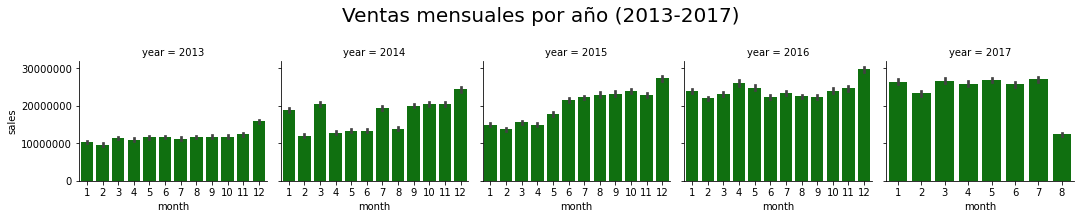

In [43]:
g = sns.FacetGrid(df_complete, col = "year", col_wrap = 5, sharex = False)
g.map_dataframe(sns.barplot, x = 'month', y = "sales", color = 'green', estimator=sum)
for ax in g.axes.flat:
    ax.yaxis.get_major_formatter().set_scientific(False)
    ax.yaxis.get_major_formatter().set_useOffset(False)
g.add_legend()
plt.suptitle('Ventas mensuales por año (2013-2017)', va = 'top', fontsize = 20, y = 1.00)
plt.tight_layout()
plt.savefig('Ventas mensuales por año (2013-2017).png')

#### Insights

- Las ventas tienen un crecimiento cada año desde el año 2013 hasta el 2017
- Todas las tiendas tienen históricamente un máximo en el mes 12, diciembre
- Mes puede ser una columna significativa para la predicción de ventas

### 2) Ventas mensuales por mes por cluster (2013-2017)

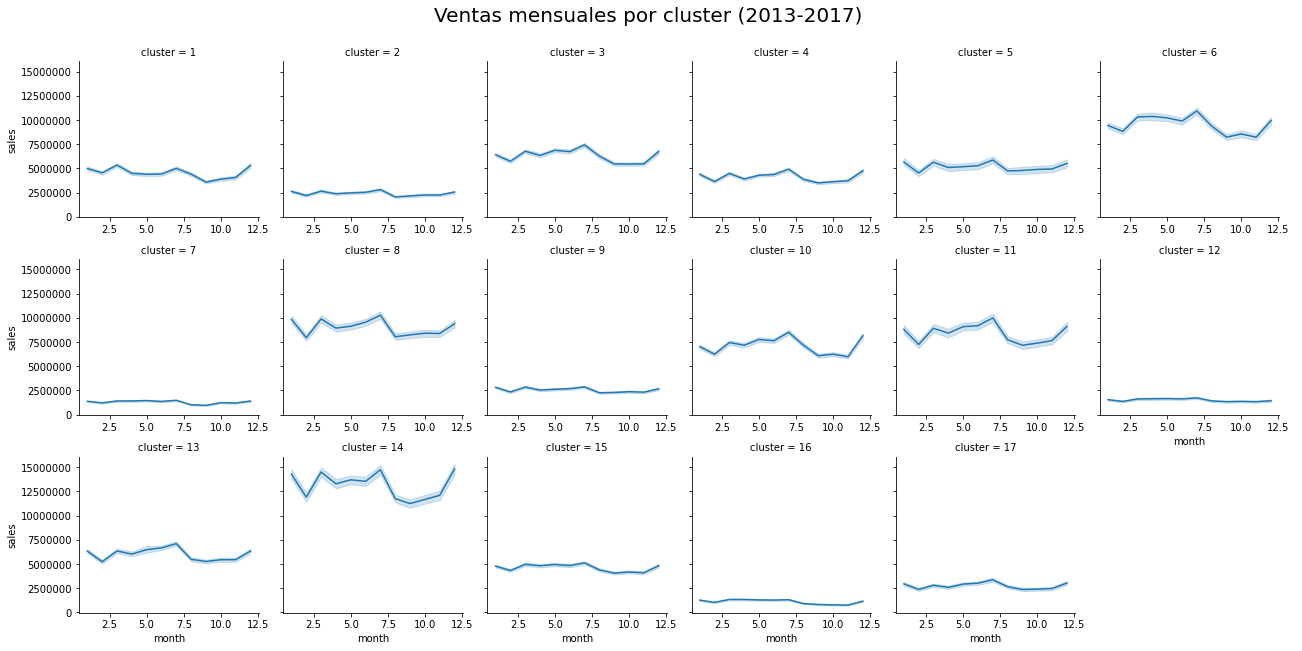

In [41]:
g = sns.FacetGrid(df_complete, col = "cluster", col_wrap = 6, sharex = False)
g.map_dataframe(sns.lineplot, x = 'month', y = "sales", estimator = sum)
for ax in g.axes.flat:
    ax.yaxis.get_major_formatter().set_scientific(False)
    ax.yaxis.get_major_formatter().set_useOffset(False)
g.add_legend()
plt.suptitle('Ventas mensuales por cluster (2013-2017)', va = 'top', fontsize = 20, y = 1.00)
plt.tight_layout()
plt.savefig('Ventas mensuales por cluster (2013-2017).png')

### Insights
-  Los cinco clústeres con mayores ventas durante el año son el 6, 8, 10,11 y 14
-  Todas las tiendas tienen históricamente un máximo en el mes 12, diciembre
-  Cluster es probablemente una columna que tenga un efecto en la predicción de ventas

### 3) Ventas mensuales por mes por tipo de tienda (2013-2017)

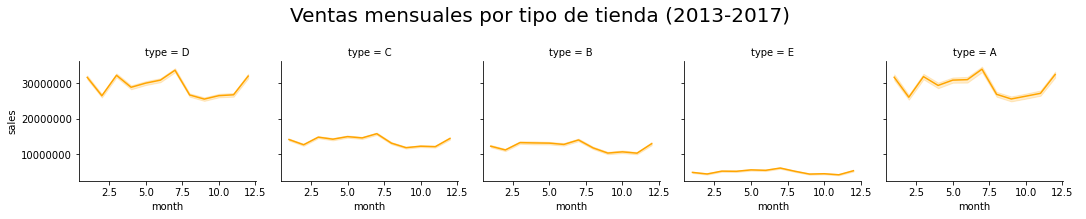

In [42]:
g = sns.FacetGrid(df_complete, col = "type", col_wrap = 5, sharex = False)
g.map_dataframe(sns.lineplot, x = 'month', y = "sales", color = 'orange', estimator = sum)
for ax in g.axes.flat:
    ax.yaxis.get_major_formatter().set_scientific(False)
    ax.yaxis.get_major_formatter().set_useOffset(False)
g.add_legend()
plt.suptitle('Ventas mensuales por tipo de tienda (2013-2017)', va = 'top', fontsize = 20, y = 1.00)
plt.tight_layout()
plt.savefig('Ventas mensuales por tipo de tienda (2013-2017).png')

### Insights
-  Las tiendas de tipo A y tipo D tienen una diferencia de ventas significativa (~200%) con ventas mayores respecto a los otros tipos de tiendas
-  Las tiendas de tipo E tienen las menores ventas durante todo el periodo analizado, con menos de 5,000,000 de ventas por mes
-  Type es probablemente una columna que tendrá impacto en la predicción de ventas

### 4) Ventas totales por tipo de familia

Text(0.5, 1.0, 'Ventas por tipo familia (2013-2017)')

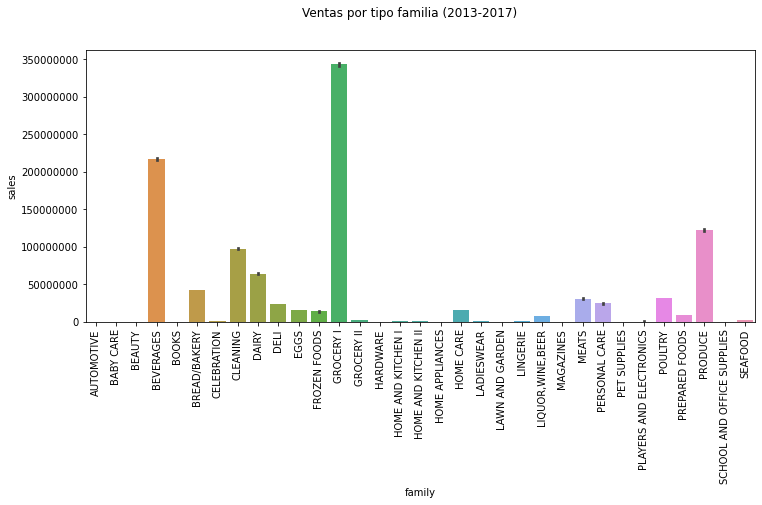

In [141]:
plt.figure(figsize = (12,5))
g = sns.barplot(data = df_complete, x = 'family', y = 'sales', estimator = sum)
g.yaxis.get_major_formatter().set_scientific(False)
g.yaxis.get_major_formatter().set_useOffset(False)
g.set_xticklabels(labels = df_complete['family'].unique(), rotation=90)
plt.suptitle('Ventas por tipo familia (2013-2017)', va = 'top', fontsize = 12, y = 1.00)

### Insights
-  Las tres familias de productos con más ventas históricamente son Grocery I, Produce y Beverages
-  Familias como Automotive, Baby Care, Beauty, Hardware, Home Appliances, Lawn and Garden, Pet Supplies, Electronics y Seafood  tienen ventas mínimas comparadas con las demás

### 5) Gráficas de dispersión entre todas las variables

<Figure size 864x864 with 0 Axes>

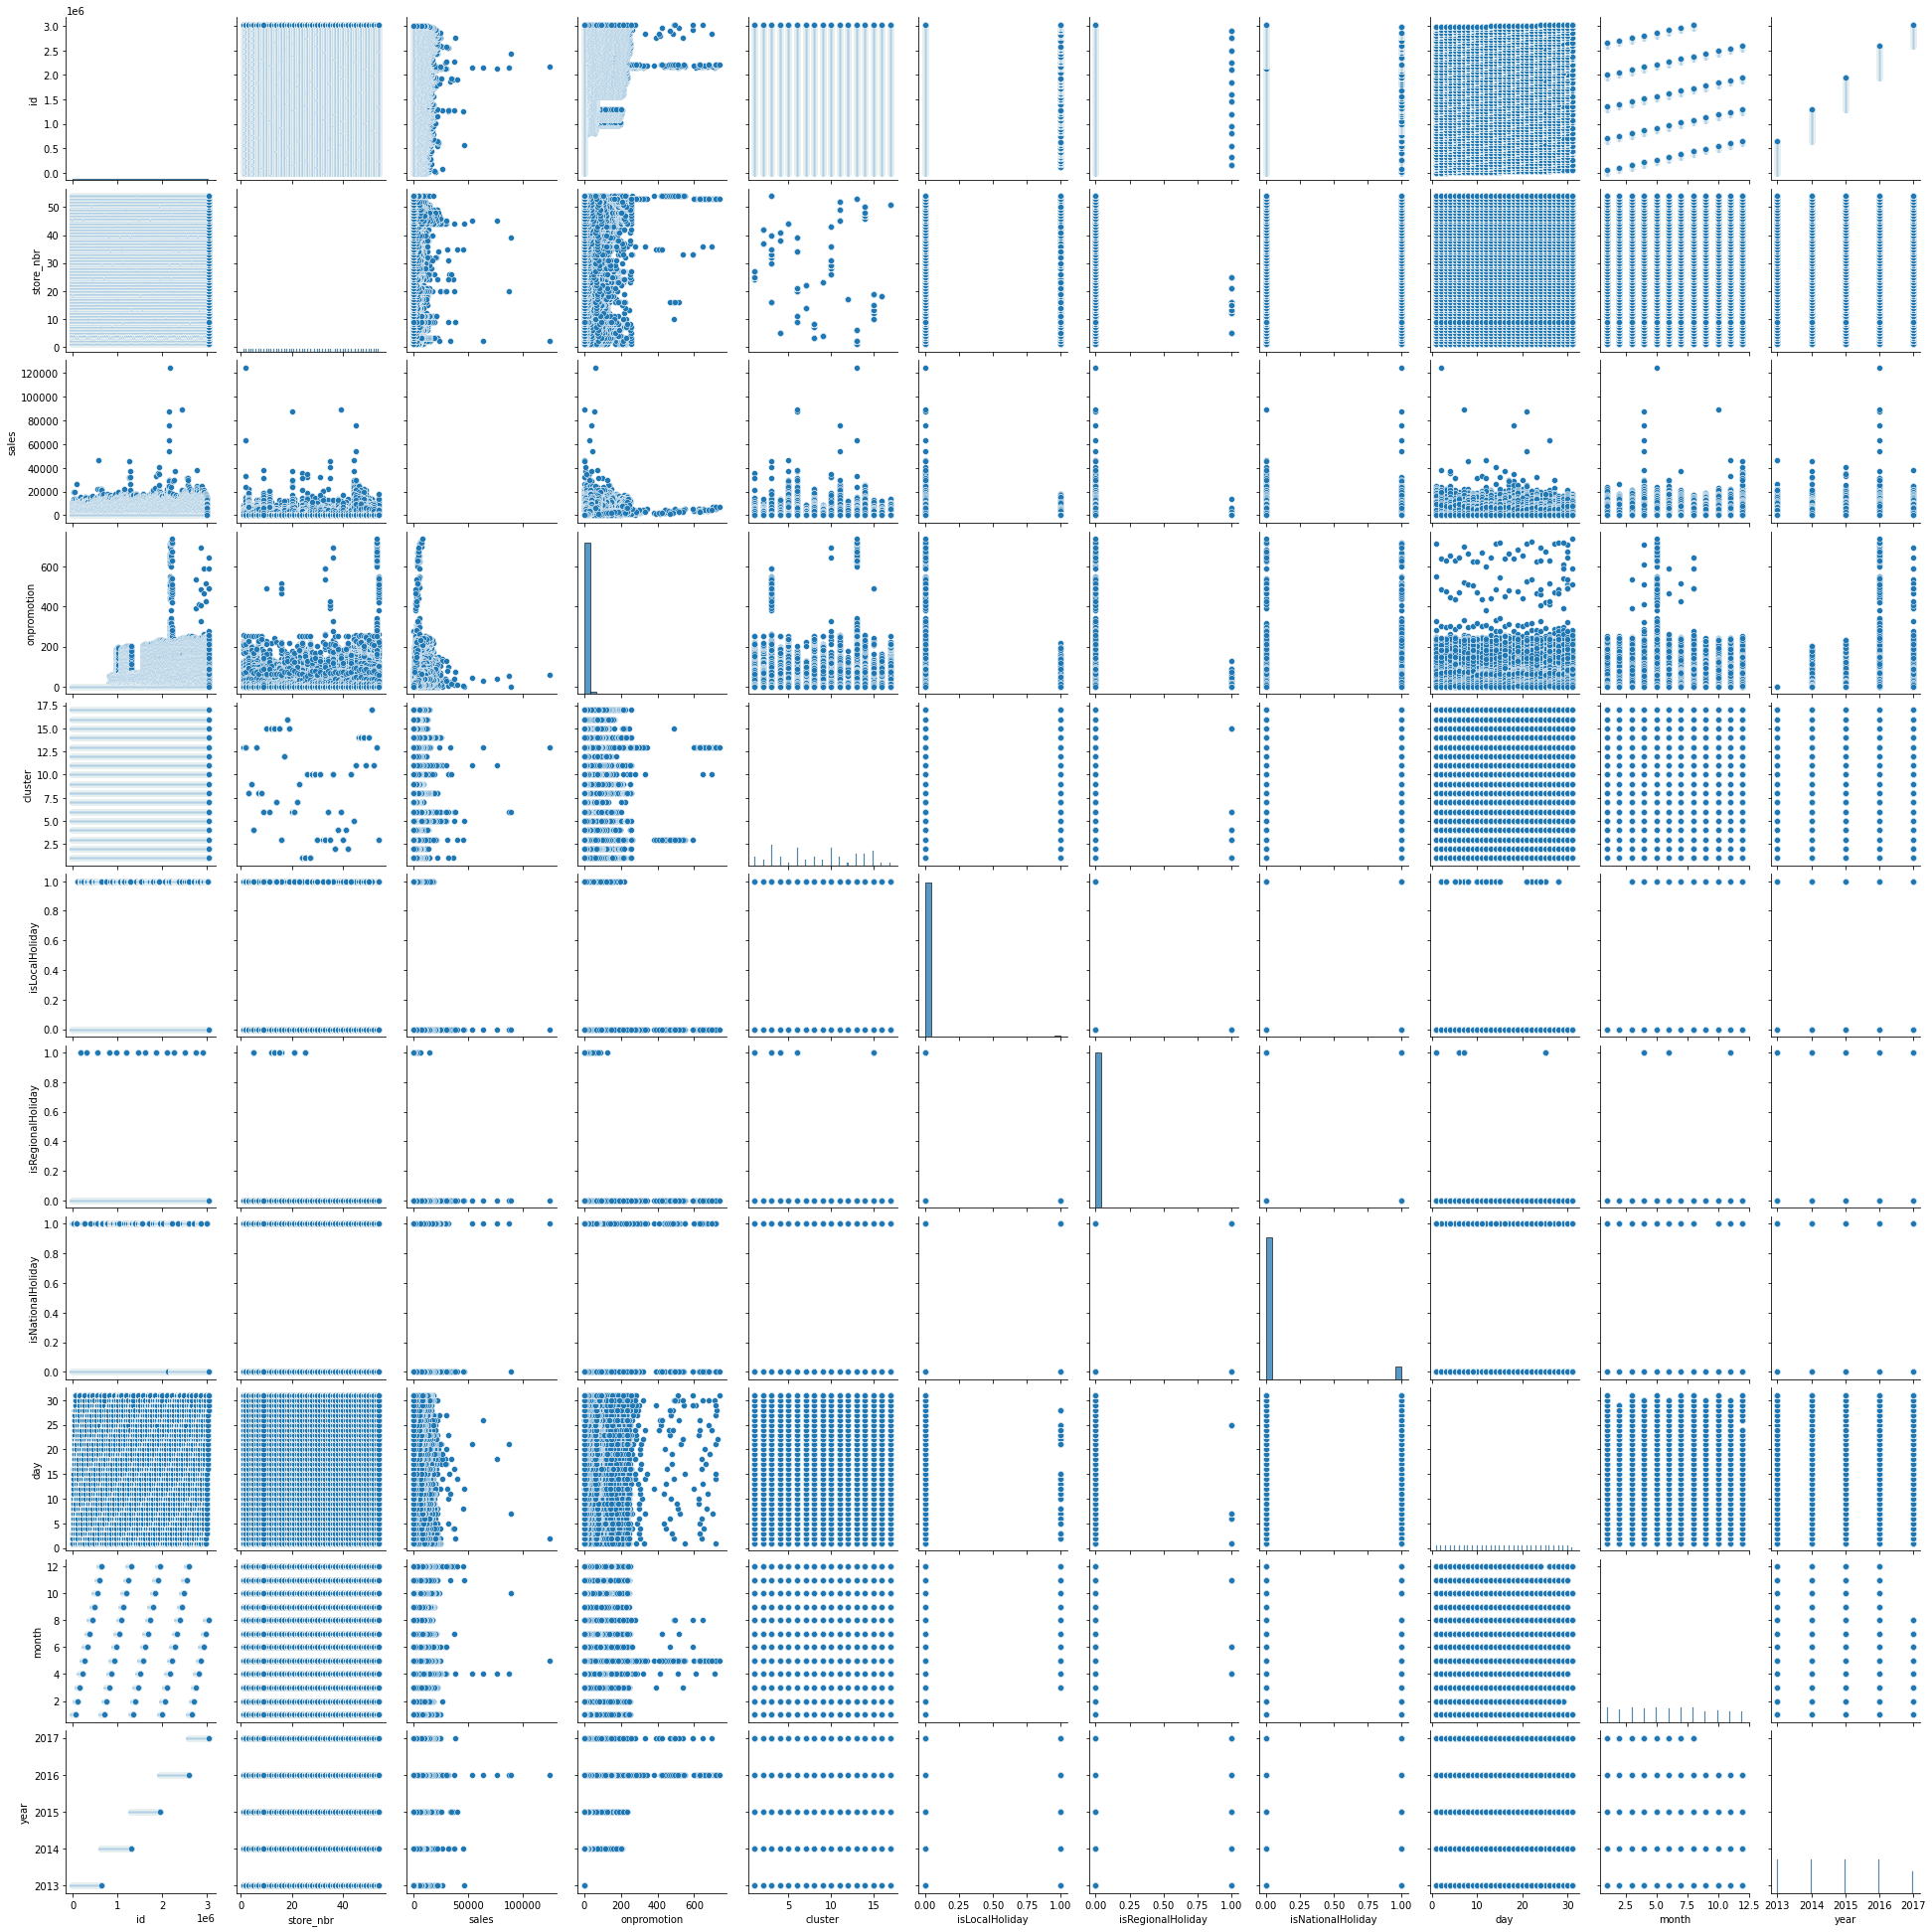

In [41]:
plt.figure(figsize = (12,12))
g = sns.pairplot(df_complete)

### Insights
-  No se identifica ninguna correlación muy marcada además de las columnas generadas de fechas, por obvias razones

### 6) Mapa de correlación entre variables

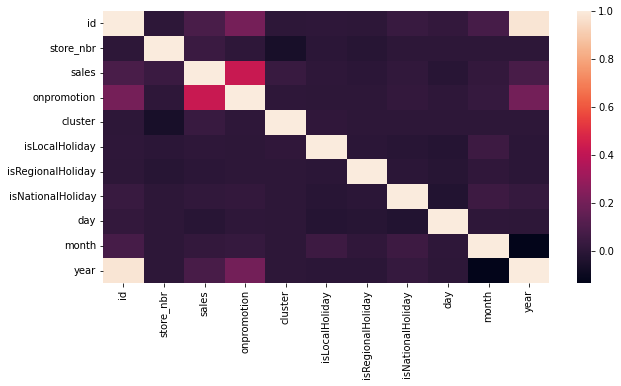

In [125]:
plt.figure(figsize = (10,5))
g = sns.heatmap(df_complete.corr())

In [131]:
c = df_complete.corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort")
so[90:110]

isLocalHoliday  month             0.051268
month           isLocalHoliday    0.051268
cluster         store_nbr         0.059284
store_nbr       cluster           0.059284
month           id                0.074973
id              month             0.074973
year            sales             0.081093
sales           year              0.081093
                id                0.085784
id              sales             0.085784
month           year              0.133497
year            month             0.133497
                onpromotion       0.199208
onpromotion     year              0.199208
id              onpromotion       0.206234
onpromotion     id                0.206234
sales           onpromotion       0.427923
onpromotion     sales             0.427923
year            id                0.978092
id              year              0.978092
dtype: float64


#### Las 10 correlaciones más altas entre las variables son:

1. Year - Id: 0.978
2. Onpromotion - Sales: 0.428
3. Onpromotion - Id: 0.206
4. Onpromotion - Year: 0.199
5. Year - Month: 0.133
6. Id - Sales : 0.0857
7. Sales - Year: 0.081
8. Id - Month: 0.075
9. Store_nbr - Cluster: 0.059
10. Month - IsLocalHoliday: 0.041

#### Correlación con sales

In [132]:
df_complete.corr()['sales'].to_frame().sort_values(by = 'sales', ascending = False).transpose()

,sales,onpromotion,id,year,store_nbr,cluster,month,isNationalHoliday,isLocalHoliday,isRegionalHoliday,day
sales,1.0,0.427923,0.085784,0.081093,0.041196,0.038525,0.01979,0.015149,0.003901,-0.002146,-0.011887


##### En general, todas las variables tienen baja relación con las ventas, lo cual no es bueno para la creación de un modelo predictivo. La única variable que parece tener relación con sales es onpromotion.

> ## E. Análisis estadístico

In [159]:
df_sales = df_complete[['sales']].copy()
df_sales.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,sales
count,3000888.00000
mean,357.77575
std,1101.99772
min,0.00000
25%,0.00000
50%,11.00000
75%,195.84725
max,124717.00000


### 1) Ventas por año

In [178]:
df_complete['sales'].groupby(df_complete['year']).agg(['mean','min','max','std', 'var']).apply(lambda s: s.apply('{0:.5f}'.format))

,mean,min,max,std,var
year,,,,,
2013,216.47953,0.00000,46271.00000,734.07453,538865.41499
2014,322.93979,0.00000,45361.00000,1004.78445,1009591.78862
2015,371.35719,0.00000,40351.46000,1100.27800,1210611.67836
2016,443.79030,0.00000,124717.00000,1292.74033,1671177.56703
2017,480.12447,0.00000,38422.62500,1355.19131,1836543.48409


### 2) Ventas por tipo de tienda

In [177]:
df_complete['sales'].groupby(df_complete['type']).agg(['mean','min','max','std', 'var'])

,mean,min,max,std,var
type,,,,,
A,705.878743,0.0,76090.000,1892.700760,3.582316e+06
B,326.739714,0.0,89576.360,977.528999,9.555629e+05
C,197.263301,0.0,45361.000,581.310901,3.379224e+05
D,350.979407,0.0,124717.000,965.728732,9.326320e+05
E,269.121301,0.0,16542.902,761.422519,5.797643e+05


### 3) Distribución de ventas por familia

In [36]:
df_complete['sales'].groupby(df_complete['family']).agg(['mean','min','max','std', 'var']).apply(lambda s: s.apply('{0:.5f}'.format))

,mean,min,max,std,var
family,,,,,
AUTOMOTIVE,6.10124,0.00000,255.00000,6.19169,38.33703
BABY CARE,0.11053,0.00000,116.00000,0.68106,0.46385
BEAUTY,3.71572,0.00000,136.00000,4.79467,22.98884
BEVERAGES,2385.79315,0.00000,25413.00000,2307.88231,5326320.73551
BOOKS,0.07080,0.00000,51.00000,0.54798,0.30028
BREAD/BAKERY,463.33625,0.00000,4551.29800,368.24637,135605.38669
CELEBRATION,8.37047,0.00000,1783.00000,15.92711,253.67296
CLEANING,1072.41674,0.00000,11377.00000,734.68149,539756.89626
DAIRY,709.15489,0.00000,5636.00000,671.94964,451516.31596


### 4) Distribución de ventas por familia

Text(0.5, 1.0, 'Distribución de ventas por familia')

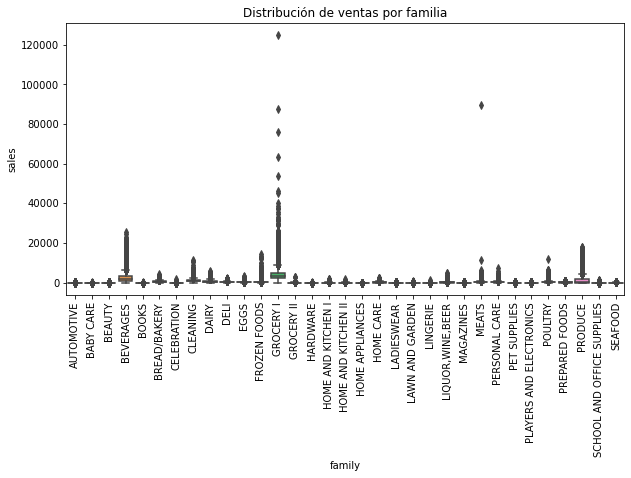

In [153]:
plt.figure(figsize = (10,5))
g = sns.boxplot(data = df_complete, x = 'family', y = 'sales')
g.set_xticklabels(labels = df_complete['family'].unique(), rotation=90)
plt.title('Distribución de ventas por familia')

### 5) Distribución de ventas por tipo de tienda

Text(0.5, 1.0, 'Distribución de ventas por tipo de tienda')

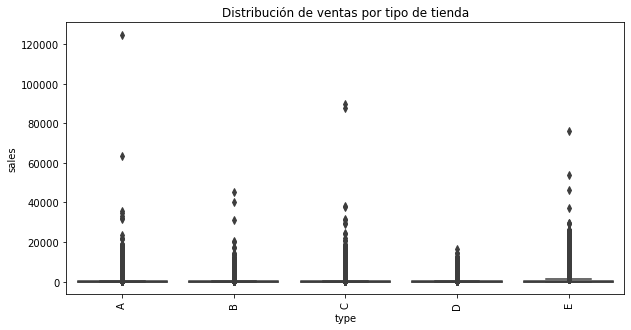

In [163]:
plt.figure(figsize = (10,5))
g = sns.boxplot(data = df_complete, x = 'type', y = 'sales')
g.set_xticklabels(labels = sorted(df_complete['type'].unique()), rotation=90)
plt.title('Distribución de ventas por tipo de tienda')

### 6) Distribución de ventas por año

Text(0.5, 1.0, 'Distribución de ventas por año')

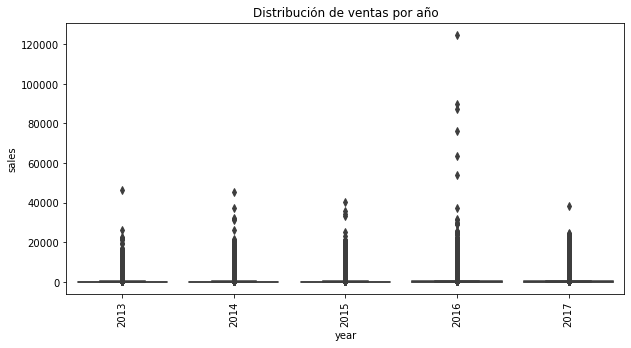

In [38]:
plt.figure(figsize = (10,5))
g = sns.boxplot(data = df_complete, x = 'year', y = 'sales')
g.set_xticklabels(labels = sorted(df_complete['year'].unique()), rotation=90)
plt.title('Distribución de ventas por año')

#### Eliminar las columnas que se generaron específicamente para las visualizaciones, posteriormente se generará una tabla de fechas más completa

In [39]:
df_complete.drop(columns = ['datetime', 'day', 'month', 'year'], inplace = True)

> ## F. Feature Engineering

#### Creación de tabla de fechas

In [71]:
date_table = pd.DataFrame({'date': pd.date_range(min(df_train['date']), max(df_train['date']))})
date_table['day'] = date_table.date.dt.day
date_table['month'] = date_table.date.dt.month
date_table['year'] = date_table.date.dt.year
date_table['weekDay'] = date_table.date.dt.weekday
date_table['yearWeek'] = date_table.date.dt.isocalendar().week
date_table['quarter'] = date_table.date.dt.quarter
date_table['year_half'] = (date_table.quarter + 1) // 2
date_table['isWeekend'] = 0
date_table.loc[date_table['weekDay'] > 4,'isWeekend'] = 1
date_table.head()

,date,day,month,year,weekDay,yearWeek,quarter,year_half,isWeekend
0,2013-01-01,1,1,2013,1,1,1,1,0
1,2013-01-02,2,1,2013,2,1,1,1,0
2,2013-01-03,3,1,2013,3,1,1,1,0
3,2013-01-04,4,1,2013,4,1,1,1,0
4,2013-01-05,5,1,2013,5,1,1,1,1


#### Realizar el join

In [72]:
date_table['date'] = date_table['date'].astype(str)
df_complete = pd.merge(left = df_complete, right = date_table, how = 'left', on = 'date')
df_complete.drop(columns = ['date'], inplace = True)
df_complete.head()

,id,store_nbr,family,sales,onpromotion,city,state,type,cluster,country,...,isRegionalHoliday,isNationalHoliday,day,month,year,weekDay,yearWeek,quarter,year_half,isWeekend
0,0,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,Ecuador,...,0.0,1.0,1,1,2013,1,1,1,1,0
1,1,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,Ecuador,...,0.0,1.0,1,1,2013,1,1,1,1,0
2,2,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,Ecuador,...,0.0,1.0,1,1,2013,1,1,1,1,0
3,3,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,Ecuador,...,0.0,1.0,1,1,2013,1,1,1,1,0
4,4,1,BOOKS,0.0,0,Quito,Pichincha,D,13,Ecuador,...,0.0,1.0,1,1,2013,1,1,1,1,0


### Promedio, máximo y mínimo móvil de la familia de productos en cada tienda

- Ventas: 23 y 31 últimos días (con el fin de tener en el último día de predicción al menos 7 días anteriores al día inicial de predicción)

In [73]:
for days in [23, 31]:
    df_complete['sales_mean_last{}'.format(days)] = df_complete.groupby(['family', 'store_nbr'])['sales'].transform(lambda x: x.rolling(window=days, min_periods=1).mean())
    
for days in [23, 31]:
    df_complete['sales_max_last{}'.format(days)] = df_complete.groupby(['family', 'store_nbr'])['sales'].transform(lambda x: x.rolling(window=days, min_periods=1).max())
    
for days in [23, 31]:
    df_complete['sales_min_last{}'.format(days)] = df_complete.groupby(['family', 'store_nbr'])['sales'].transform(lambda x: x.rolling(window=days, min_periods=1).min())

In [74]:
df_complete.tail()

,id,store_nbr,family,sales,onpromotion,city,state,type,cluster,country,...,yearWeek,quarter,year_half,isWeekend,sales_mean_last23,sales_mean_last31,sales_max_last23,sales_max_last31,sales_min_last23,sales_min_last31
3029395,3029395,9,POULTRY,NaN,1,Quito,Pichincha,B,6,Ecuador,...,35,3,2,0,381.083426,446.701329,525.224,612.789000,283.429,283.429000
3029396,3029396,9,PREPARED FOODS,NaN,0,Quito,Pichincha,B,6,Ecuador,...,35,3,2,0,121.605856,116.173799,154.553,162.324000,105.169,50.462997
3029397,3029397,9,PRODUCE,NaN,1,Quito,Pichincha,B,6,Ecuador,...,35,3,2,0,1525.855714,1663.729200,2419.729,2470.461000,1036.439,1036.439000
3029398,3029398,9,SCHOOL AND OFFICE SUPPLIES,NaN,9,Quito,Pichincha,B,6,Ecuador,...,35,3,2,0,144.571429,153.600000,200.000,203.000000,83.000,83.000000
3029399,3029399,9,SEAFOOD,NaN,0,Quito,Pichincha,B,6,Ecuador,...,35,3,2,0,17.948857,19.022867,23.831,25.008999,14.350,13.000000


- Ventas: 3, 4 y 6 últimos mismos días de la semana

In [75]:
for days in [4, 5, 6]:
    df_complete['weekDaySales_mean_last{}'.format(days)] = df_complete.groupby(['family', 'store_nbr', 'weekDay'])['sales'].transform(lambda x: x.rolling(window=days, min_periods=1).mean())
    
for days in [4, 5, 6]:
    df_complete['weekDaySales_max_last{}'.format(days)] = df_complete.groupby(['family', 'store_nbr', 'weekDay'])['sales'].transform(lambda x: x.rolling(window=days, min_periods=1).max())
    
for days in [4, 5, 6]:
    df_complete['weekDaySales_min_last{}'.format(days)] = df_complete.groupby(['family', 'store_nbr', 'weekDay'])['sales'].transform(lambda x: x.rolling(window=days, min_periods=1).min())

In [76]:
df_complete.tail()

,id,store_nbr,family,sales,onpromotion,city,state,type,cluster,country,...,sales_min_last31,weekDaySales_mean_last4,weekDaySales_mean_last5,weekDaySales_mean_last6,weekDaySales_max_last4,weekDaySales_max_last5,weekDaySales_max_last6,weekDaySales_min_last4,weekDaySales_min_last5,weekDaySales_min_last6
3029395,3029395,9,POULTRY,NaN,1,Quito,Pichincha,B,6,Ecuador,...,283.429000,291.82098,358.88349,337.525993,291.82098,425.946,425.946,291.82098,291.82098,291.82098
3029396,3029396,9,PREPARED FOODS,NaN,0,Quito,Pichincha,B,6,Ecuador,...,50.462997,111.93000,97.67800,95.897667,111.93000,111.930,111.930,111.93000,83.42600,83.42600
3029397,3029397,9,PRODUCE,NaN,1,Quito,Pichincha,B,6,Ecuador,...,1036.439000,1036.43900,1200.50850,1179.997667,1036.43900,1364.578,1364.578,1036.43900,1036.43900,1036.43900
3029398,3029398,9,SCHOOL AND OFFICE SUPPLIES,NaN,9,Quito,Pichincha,B,6,Ecuador,...,83.000000,148.00000,143.50000,97.666667,148.00000,148.000,148.000,148.00000,139.00000,6.00000
3029399,3029399,9,SEAFOOD,NaN,0,Quito,Pichincha,B,6,Ecuador,...,13.000000,14.35000,18.06400,14.923333,14.35000,21.778,21.778,14.35000,14.35000,8.64200


###  Eliminación de filas anteriores al momento inicial en donde todas las columnas calculadas tienen sentido para el rango que están considerando (últimos 31 días, últimos 6 mismos días de la semana, etc.)

In [77]:
df_complete[df_complete['weekDaySales_mean_last5'] != df_complete['weekDaySales_mean_last6']]

,id,store_nbr,family,sales,onpromotion,city,state,type,cluster,country,...,sales_min_last31,weekDaySales_mean_last4,weekDaySales_mean_last5,weekDaySales_mean_last6,weekDaySales_max_last4,weekDaySales_max_last5,weekDaySales_max_last6,weekDaySales_min_last4,weekDaySales_min_last5,weekDaySales_min_last6
62370,62370,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13,Ecuador,...,0.000000,1.00000,1.20000,1.000000,2.00000,2.000,2.000,0.00000,0.00000,0.00000
62372,62372,1,BEAUTY,3.000,0,Quito,Pichincha,D,13,Ecuador,...,0.000000,1.75000,2.00000,1.666667,3.00000,3.000,3.000,0.00000,0.00000,0.00000
62373,62373,1,BEVERAGES,794.000,0,Quito,Pichincha,D,13,Ecuador,...,407.000000,978.00000,988.20000,823.500000,1149.00000,1149.000,1149.000,794.00000,794.00000,0.00000
62375,62375,1,BREAD/BAKERY,253.111,0,Quito,Pichincha,D,13,Ecuador,...,112.410995,268.58550,279.23860,232.698833,299.20100,321.851,321.851,236.41800,236.41800,0.00000
62377,62377,1,CLEANING,739.000,0,Quito,Pichincha,D,13,Ecuador,...,240.000000,703.50000,728.20000,606.833333,777.00000,827.000,827.000,612.00000,612.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3029395,3029395,9,POULTRY,NaN,1,Quito,Pichincha,B,6,Ecuador,...,283.429000,291.82098,358.88349,337.525993,291.82098,425.946,425.946,291.82098,291.82098,291.82098
3029396,3029396,9,PREPARED FOODS,NaN,0,Quito,Pichincha,B,6,Ecuador,...,50.462997,111.93000,97.67800,95.897667,111.93000,111.930,111.930,111.93000,83.42600,83.42600
3029397,3029397,9,PRODUCE,NaN,1,Quito,Pichincha,B,6,Ecuador,...,1036.439000,1036.43900,1200.50850,1179.997667,1036.43900,1364.578,1364.578,1036.43900,1036.43900,1036.43900
3029398,3029398,9,SCHOOL AND OFFICE SUPPLIES,NaN,9,Quito,Pichincha,B,6,Ecuador,...,83.000000,148.00000,143.50000,97.666667,148.00000,148.000,148.000,148.00000,139.00000,6.00000


#### A partir de la fila 62370, las columnas calculadas hacen sentido, es por eso que recortaremos los datos para considerar únicamente desde esta fila

In [78]:
df_complete = df_complete.iloc[62370:].reset_index(drop = True)

In [79]:
df_complete.head()

,id,store_nbr,family,sales,onpromotion,city,state,type,cluster,country,...,sales_min_last31,weekDaySales_mean_last4,weekDaySales_mean_last5,weekDaySales_mean_last6,weekDaySales_max_last4,weekDaySales_max_last5,weekDaySales_max_last6,weekDaySales_min_last4,weekDaySales_min_last5,weekDaySales_min_last6
0,62370,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,Ecuador,...,0.0,1.00,1.2,1.000000,2.0,2.0,2.0,0.0,0.0,0.0
1,62371,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,Ecuador,...,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,62372,1,BEAUTY,3.0,0,Quito,Pichincha,D,13,Ecuador,...,0.0,1.75,2.0,1.666667,3.0,3.0,3.0,0.0,0.0,0.0
3,62373,1,BEVERAGES,794.0,0,Quito,Pichincha,D,13,Ecuador,...,407.0,978.00,988.2,823.500000,1149.0,1149.0,1149.0,794.0,794.0,0.0
4,62374,1,BOOKS,0.0,0,Quito,Pichincha,D,13,Ecuador,...,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


### Encodificación de variables categóricas

La gran mayoría de modelos de ML no aceptan como entrada valores de texto, únicamente números. Es por esto, que al tener varias columnas categóricas, es necesario convertirlos a números que pueda entender el algoritmo y que representen lo que realmente significan.

Tenemos las siguientes variables categóricas con texto:

   - family
   - city
   - state
   - type

In [80]:
for column in ['family', 'city', 'state', 'type']:
    print('Column: {} | Number of unique values: {}'.format(column,len(df_complete[column].unique())))

Column: family | Number of unique values: 33
Column: city | Number of unique values: 22
Column: state | Number of unique values: 16
Column: type | Number of unique values: 5


> > ### 1) Family: Eliminación

Esta variable es de mucha utilidad porque es la granularidad (o nivel de detalle de los datos que tenemos), sin embargo tiene demasiados valores únicos como para utilizar técnicas como One-Hot y además no es posible utilizar Frequency Encoding ya que todas las familias de productos aparecen el mismo número de veces. Es por esto que al estar ya considerada en las columnas calculadas, se eliminará

In [81]:
df_complete.drop(columns = ['family'], inplace = True)

> > ### 2) City y State: Frequency encoding

Estas dos columnas tienen muchos valores únicos y no tienen algún orden nominal, así que utilizaremos frequency encoding para encodificarlas

#### City

In [82]:
city_percentage = (df_complete.groupby('city').size()) / len(df_complete)
city_percentage

city
Ambato           0.037037
Babahoyo         0.018519
Cayambe          0.018519
Cuenca           0.055556
Daule            0.018519
El Carmen        0.018519
Esmeraldas       0.018519
Guaranda         0.018519
Guayaquil        0.148148
Ibarra           0.018519
Latacunga        0.037037
Libertad         0.018519
Loja             0.018519
Machala          0.037037
Manta            0.037037
Playas           0.018519
Puyo             0.018519
Quevedo          0.018519
Quito            0.333333
Riobamba         0.018519
Salinas          0.018519
Santo Domingo    0.055556
dtype: float64

#### State

In [83]:
state_percentage = (df_complete.groupby('state').size()) / len(df_complete)
state_percentage

state
Azuay                             0.055556
Bolivar                           0.018519
Chimborazo                        0.018519
Cotopaxi                          0.037037
El Oro                            0.037037
Esmeraldas                        0.018519
Guayas                            0.203704
Imbabura                          0.018519
Loja                              0.018519
Los Rios                          0.037037
Manabi                            0.055556
Pastaza                           0.018519
Pichincha                         0.351852
Santa Elena                       0.018519
Santo Domingo de los Tsachilas    0.055556
Tungurahua                        0.037037
dtype: float64

In [84]:
df_complete['cityFreq'] = df_complete['city'].apply(lambda x : city_percentage[x])
df_complete['stateFreq'] = df_complete['state'].apply(lambda x : state_percentage[x])
df_complete.drop(columns = ['city', 'state', 'country'], inplace = True)

In [85]:
df_complete.head()

,id,store_nbr,sales,onpromotion,type,cluster,isLocalHoliday,isRegionalHoliday,isNationalHoliday,day,...,weekDaySales_mean_last5,weekDaySales_mean_last6,weekDaySales_max_last4,weekDaySales_max_last5,weekDaySales_max_last6,weekDaySales_min_last4,weekDaySales_min_last5,weekDaySales_min_last6,cityFreq,stateFreq
0,62370,1,0.0,0,D,13,0.0,0.0,0.0,5,...,1.2,1.000000,2.0,2.0,2.0,0.0,0.0,0.0,0.333333,0.351852
1,62371,1,0.0,0,D,13,0.0,0.0,0.0,5,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.351852
2,62372,1,3.0,0,D,13,0.0,0.0,0.0,5,...,2.0,1.666667,3.0,3.0,3.0,0.0,0.0,0.0,0.333333,0.351852
3,62373,1,794.0,0,D,13,0.0,0.0,0.0,5,...,988.2,823.500000,1149.0,1149.0,1149.0,794.0,794.0,0.0,0.333333,0.351852
4,62374,1,0.0,0,D,13,0.0,0.0,0.0,5,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.351852


> > ### 3) Type

Esta es una variable con pocos valores únicos, por lo que podemos proceder con One-Hot Encoding.

In [86]:
typeColumns = pd.get_dummies(df_complete['type'], prefix = 'type_')
df_complete = df_complete.join(typeColumns)
df_complete.drop(columns = ['type'], inplace = True)
df_complete.head()

,id,store_nbr,sales,onpromotion,cluster,isLocalHoliday,isRegionalHoliday,isNationalHoliday,day,month,...,weekDaySales_min_last4,weekDaySales_min_last5,weekDaySales_min_last6,cityFreq,stateFreq,type__A,type__B,type__C,type__D,type__E
0,62370,1,0.0,0,13,0.0,0.0,0.0,5,2,...,0.0,0.0,0.0,0.333333,0.351852,0,0,0,1,0
1,62371,1,0.0,0,13,0.0,0.0,0.0,5,2,...,0.0,0.0,0.0,0.333333,0.351852,0,0,0,1,0
2,62372,1,3.0,0,13,0.0,0.0,0.0,5,2,...,0.0,0.0,0.0,0.333333,0.351852,0,0,0,1,0
3,62373,1,794.0,0,13,0.0,0.0,0.0,5,2,...,794.0,794.0,0.0,0.333333,0.351852,0,0,0,1,0
4,62374,1,0.0,0,13,0.0,0.0,0.0,5,2,...,0.0,0.0,0.0,0.333333,0.351852,0,0,0,1,0


In [87]:
df_complete.iloc[-28513:][['day','month','year']].head()

,day,month,year
2938517,15,8,2017
2938518,16,8,2017
2938519,16,8,2017
2938520,16,8,2017
2938521,16,8,2017


> ## G. Tareas previas a modelado

### Separación de dataset en entrenamiento y prueba

#### Como originalmente se mencionó, al unir el set de datos de entrenamiento y prueba se facilitó el proceso de preparación de los datos. Ahora, se separarán en sus filas originales, tomando los primeros 3,000,888 filas para entrenamiento y las últimas 28,512 filas para prueba.

In [88]:
X_train = df_complete.iloc[:-28512].drop(columns = ['sales'])
y_train = df_complete.iloc[:-28512]['sales']
X_test = df_complete.iloc[-28512:].drop(columns = ['sales'])

In [89]:
X_train.tail()

,id,store_nbr,onpromotion,cluster,isLocalHoliday,isRegionalHoliday,isNationalHoliday,day,month,year,...,weekDaySales_min_last4,weekDaySales_min_last5,weekDaySales_min_last6,cityFreq,stateFreq,type__A,type__B,type__C,type__D,type__E
2938513,3000883,9,0,6,0.0,0.0,0.0,15,8,2017,...,320.009000,320.009000,320.009000,0.333333,0.351852,0,1,0,0,0
2938514,3000884,9,1,6,0.0,0.0,0.0,15,8,2017,...,50.462997,50.462997,50.462997,0.333333,0.351852,0,1,0,0,0
2938515,3000885,9,148,6,0.0,0.0,0.0,15,8,2017,...,2100.046000,2100.046000,2100.046000,0.333333,0.351852,0,1,0,0,0
2938516,3000886,9,8,6,0.0,0.0,0.0,15,8,2017,...,5.000000,0.000000,0.000000,0.333333,0.351852,0,1,0,0,0
2938517,3000887,9,0,6,0.0,0.0,0.0,15,8,2017,...,15.678000,10.200000,9.441000,0.333333,0.351852,0,1,0,0,0


In [90]:
y_train.head()

0      0.0
1      0.0
2      3.0
3    794.0
4      0.0
Name: sales, dtype: float64

In [91]:
X_test.head()

,id,store_nbr,onpromotion,cluster,isLocalHoliday,isRegionalHoliday,isNationalHoliday,day,month,year,...,weekDaySales_min_last4,weekDaySales_min_last5,weekDaySales_min_last6,cityFreq,stateFreq,type__A,type__B,type__C,type__D,type__E
2938518,3000888,1,0,13,0.0,0.0,0.0,16,8,2017,...,2.0,2.0,2.0,0.333333,0.351852,0,0,0,1,0
2938519,3000889,1,0,13,0.0,0.0,0.0,16,8,2017,...,0.0,0.0,0.0,0.333333,0.351852,0,0,0,1,0
2938520,3000890,1,2,13,0.0,0.0,0.0,16,8,2017,...,2.0,2.0,2.0,0.333333,0.351852,0,0,0,1,0
2938521,3000891,1,20,13,0.0,0.0,0.0,16,8,2017,...,2242.0,2242.0,2242.0,0.333333,0.351852,0,0,0,1,0
2938522,3000892,1,0,13,0.0,0.0,0.0,16,8,2017,...,0.0,0.0,0.0,0.333333,0.351852,0,0,0,1,0


In [92]:
X_train.dtypes

id                           int64
store_nbr                    int64
onpromotion                  int64
cluster                      int64
isLocalHoliday             float64
isRegionalHoliday          float64
isNationalHoliday          float64
day                          int64
month                        int64
year                         int64
weekDay                      int64
yearWeek                    UInt32
quarter                      int64
year_half                    int64
isWeekend                    int64
sales_mean_last23          float64
sales_mean_last31          float64
sales_max_last23           float64
sales_max_last31           float64
sales_min_last23           float64
sales_min_last31           float64
weekDaySales_mean_last4    float64
weekDaySales_mean_last5    float64
weekDaySales_mean_last6    float64
weekDaySales_max_last4     float64
weekDaySales_max_last5     float64
weekDaySales_max_last6     float64
weekDaySales_min_last4     float64
weekDaySales_min_las

In [93]:
X_train['yearWeek'] = X_train['yearWeek'].astype('int')

> ## H. Modelado

- ## Modelo 1: Últimas 15,000 filas

### RandomForestRegressor()

In [130]:
X_train15k = X_train.iloc[-15000:]
y_train15k = y_train.iloc[-15000:]

In [131]:
modelo15k_rf = RandomForestRegressor()
print("Model created")
print("Model fitting...")
modelo15k_rf.fit(X_train15k, y_train15k)
print("Model fitted")
print("Model predicting...")
y_pred1 = modelo15k_rf.predict(X_test)
print("Predictions done.")

Model created
Model fitting...
Model fitted
Model predicting...
Predictions done.


### Score: 0.47824

### DecisionTreeRegressor()

In [94]:
modelo15k_DT = DecisionTreeRegressor()
print("Model created")
print("Model fitting...")
modelo15k_DT.fit(X_train15k, y_train15k)
print("Model fitted")
print("Model predicting...")
y_pred2 = modelo15k_DT.predict(X_test)
print("Predictions done.")

Model created
Model fitting...
Model fitted
Model predicting...
Predictions done.


### Score: 0.58283

- ## Modelo 2: Últimas 25,000 filas

In [51]:
X_train25k = X_train.iloc[-25000:]
y_train25k = y_train.iloc[-25000:]

### RandomForestRegressor()

In [52]:
modelo25k_rf = RandomForestRegressor()
print("Model created")
print("Model fitting...")
modelo25k_rf.fit(X_train25k, y_train25k)
print("Model fitted")
print("Model predicting...")
y_pred3 = modelo25k_rf.predict(X_test)
print("Predictions done.")

Model created
Model fitting...
Model fitted
Model predicting...
Predictions done.


### Score: 0.46888

### DecisionTreeRegressor()

In [66]:
modelo25k_DT = DecisionTreeRegressor()
print("Model created")
print("Model fitting...")
modelo25k_DT.fit(X_train25k, y_train25k)
print("Model fitted")
print("Model predicting...")
y_pred4 = modelo25k_DT.predict(X_test)
print("Predictions done.")

Model created
Model fitting...
Model fitted
Model predicting...
Predictions done.


### Score: 0.55402

- ## Modelo 3: Últimas 150,000 filas

### RandomForestRegressor()

In [124]:
X_train150k = X_train.iloc[-150000:]
y_train150k = y_train.iloc[-150000:]

In [125]:
modelo150k_rf = RandomForestRegressor()
print("Model created")
print("Model fitting...")
modelo150k_rf.fit(X_train150k, y_train150k)
print("Model fitted")
print("Model predicting...")
y_pred5 = modelo150k_rf.predict(X_test)
print("Predictions done.")

Model created
Model fitting...
Model fitted
Model predicting...
Predictions done.


### Score: 0.47800

### DecisionTreeRegressor()

In [95]:
modelo150k_DT = DecisionTreeRegressor()
print("Model created")
print("Model fitting...")
modelo150k_DT.fit(X_train150k, y_train150k)
print("Model fitted")
print("Model predicting...")
y_pred6 = modelo150k_DT.predict(X_test)
print("Predictions done.")

Model created
Model fitting...
Model fitted
Model predicting...
Predictions done.


### Score: 0.57101

- ## Modelo 4: Últimas 1,500,000 filas

In [134]:
X_train1500k = X_train.iloc[-1500000:]
y_train1500k = y_train.iloc[-1500000:]

### RandomForestRegressor()

In [ ]:
modelo1500k_rf = RandomForestRegressor()
print("Model created")
print("Model fitting...")
modelo1500k_rf.fit(X_train1500k, y_train1500k)
print("Model fitted")
print("Model predicting...")
y_pred7 = modelo1500k_rf.predict(X_test)
print("Predictions done.")

Model created
Model fitting...


#### - Kernel died

### DecisionTreeRegressor()

In [ ]:
modelo1500k_DT = DecisionTreeRegressor()
print("Model created")
print("Model fitting...")
modelo1500k_DT.fit(X_train1500k, y_train1500k)
print("Model fitted")
print("Model predicting...")
y_pred8 = modelo1500k_DT.predict(X_test)
print("Predictions done.")

Model created
Model fitting...


#### - Kernel died

> ## I. Entrega de resultado

## Mejor modelo: 2) RandomForest - Muestra: 25,000 filas

<BarContainer object of 37 artists>

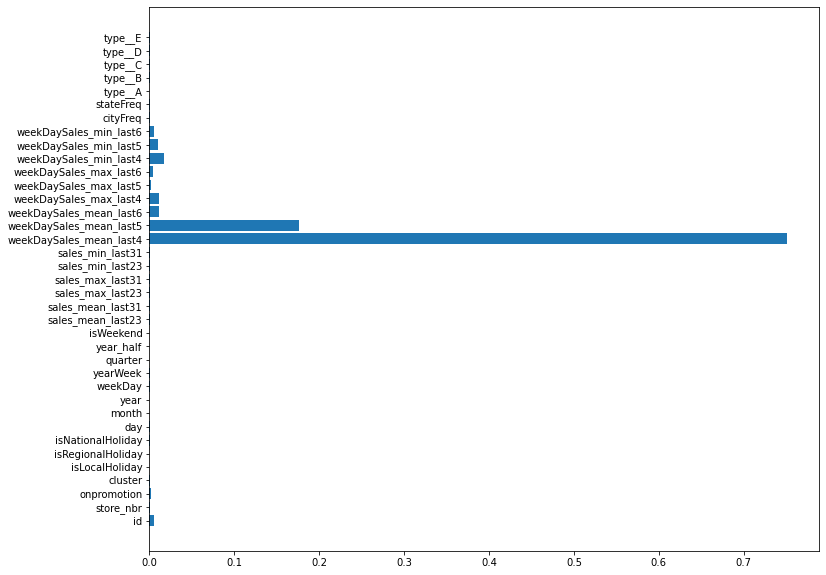

In [63]:
plt.figure(figsize = (12,10))
plt.barh(X_train25k.columns, modelo25k_rf.feature_importances_)

## Conversión a .csv para subir las predicciones

In [53]:
x_test_array = X_test['id'].to_list()

#RF15000
df_submission = pd.DataFrame(list(zip(x_test_array, y_pred1.tolist())), columns = ['id','sales'])
df_submission.to_csv('first_submission.csv', index = False)
#DT15000
df_submission2 = pd.DataFrame(list(zip(x_test_array, y_pred2.tolist())), columns = ['id','sales'])
df_submission2.to_csv('second_submission.csv', index = False)

#RF25000 
df_submission3 = pd.DataFrame(list(zip(x_test_array, y_pred3.tolist())), columns = ['id','sales'])
df_submission3.to_csv('third_submission.csv', index = False)
#DT25000
df_submission4 = pd.DataFrame(list(zip(x_test_array, y_pred4.tolist())), columns = ['id','sales'])
df_submission4.to_csv('fourth_submission.csv', index = False)

#RF150000
df_submission5 = pd.DataFrame(list(zip(x_test_array, y_pred5.tolist())), columns = ['id','sales'])
df_submission5.to_csv('fifth_submission.csv', index = False)
#DT150000
df_submission4 = pd.DataFrame(list(zip(x_test_array, y_pred6.tolist())), columns = ['id','sales'])
df_submission4.to_csv('sixth_submission.csv', index = False)